In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
with open("./results_fixed.csv", "w") as f_out:
    with open("./results.csv", "r") as f:
        for line in f:
            if len(line.split(",")) == 10:
                data = line.split(",")
                data = data[:4] + ["576"] + data[4:]
                f_out.write(",".join(data))
            else:
                f_out.write(line)

In [99]:
df = pd.read_csv("./results_fixed.csv")

In [100]:
balanced_df = df[(df["balanced"] == True) & df["label"].isin(["CUTLASS_GROUP"])].copy()
imbalanced_df = df[(df["balanced"] == False) & df["label"].isin(["CUTLASS_GROUP"])]

In [101]:
time_ratio = imbalanced_df["time"].reset_index(drop=True) / balanced_df["time"].reset_index(drop=True)

In [102]:
time_ratio

0      1.416213
1      1.417381
2      1.396818
3      1.393301
4      1.470316
         ...   
249    1.136425
250    1.087327
251    1.115826
252    1.066075
253    1.134958
Name: time, Length: 254, dtype: float64

In [103]:
balanced_df = balanced_df.reset_index(drop=True)
balanced_df["time_ratio"] = time_ratio

In [104]:
balanced_df

,m,n,k0,k1,k2,label,balanced,time,cutlass_sorted,cutlass_total_tiles,cutlass_tile_shape,time_ratio
0,128,1152,128,1024,576,CUTLASS_GROUP,True,0.013912,False,36,128x128x32,1.416213
1,128,1152,128,1024,576,CUTLASS_GROUP,True,0.013901,True,36,128x128x32,1.417381
2,256,1152,128,1024,576,CUTLASS_GROUP,True,0.015356,False,72,128x128x32,1.396818
3,256,1152,128,1024,576,CUTLASS_GROUP,True,0.015390,True,72,128x128x32,1.393301
4,384,1152,128,1024,576,CUTLASS_GROUP,True,0.015756,False,108,128x128x32,1.470316
...,...,...,...,...,...,...,...,...,...,...,...,...
249,16000,1152,128,1024,576,CUTLASS_GROUP,True,0.424387,True,4500,128x128x32,1.136425
250,16128,1152,128,1024,576,CUTLASS_GROUP,True,0.427396,False,4536,128x128x32,1.087327
251,16128,1152,128,1024,576,CUTLASS_GROUP,True,0.427098,True,4536,128x128x32,1.115826
252,16256,1152,128,1024,576,CUTLASS_GROUP,True,0.432253,False,4572,128x128x32,1.066075


{384, 768, 1920, 1152, 1536, 2304, 2688, 3072, 3456, 3840, 4224, 8448, 12672, 4608, 12288, 8832, 13056, 4992, 9216, 13440, 5376, 9600, 13824, 5760, 9984, 14208, 6144, 10368, 14592, 6528, 10752, 14976, 6912, 11136, 15360, 7296, 11520, 15744, 7680, 11904, 16128, 8064}


Text(0, 0.5, 'Time Ratio (Imbalanced / Balanced)')

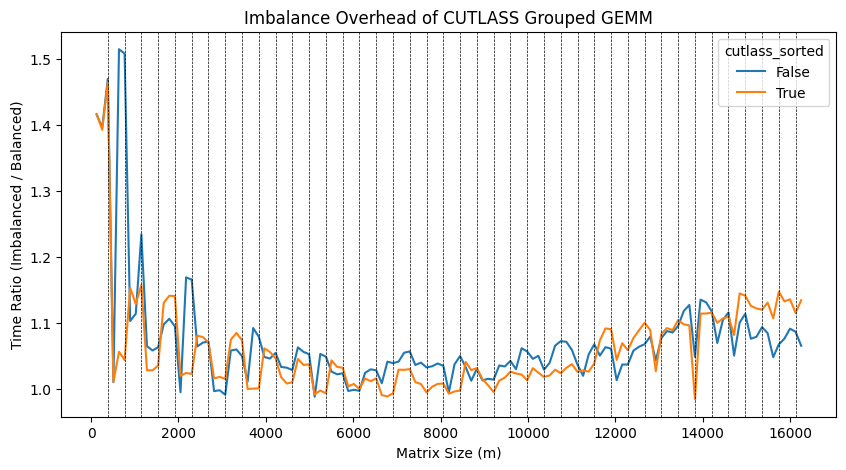

In [105]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax = sns.lineplot(data=balanced_df, x="m", y="time_ratio", hue="cutlass_sorted", ax=ax)

ms_with_block_count_mult_108 = set()
for idx, row in balanced_df.iterrows():
    if row["cutlass_sorted"] == "False" and int(row["cutlass_total_tiles"]) % 108 == 0:
        ms_with_block_count_mult_108.add(row["m"])
print(ms_with_block_count_mult_108)
ms_with_block_count_mult_108 = sorted(list(ms_with_block_count_mult_108))
# draw vertical lines
for m in ms_with_block_count_mult_108:
    ax.axvline(m, color="black", linestyle="--", linewidth=0.5)

ax.set_title("Imbalance Overhead of CUTLASS Grouped GEMM")
ax.set_xlabel("Matrix Size (m)")
ax.set_ylabel("Time Ratio (Imbalanced / Balanced)")

In [106]:
fig.savefig("cutlass_grouped_imbalance_overhead.png", dpi=300)

{384, 768, 1920, 1152, 1536, 2304, 2688, 3072, 3456, 3840, 4224, 8448, 12672, 4608, 12288, 8832, 13056, 4992, 9216, 13440, 5376, 9600, 13824, 5760, 9984, 14208, 6144, 10368, 14592, 6528, 10752, 14976, 6912, 11136, 15360, 7296, 11520, 15744, 7680, 11904, 16128, 8064}


Text(0, 0.5, 'Time Ratio (Imbalanced / Balanced)')

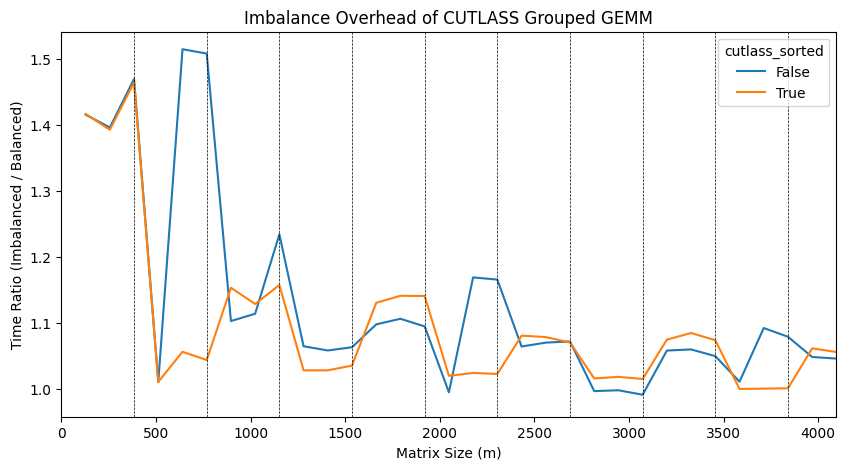

In [107]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax = sns.lineplot(data=balanced_df, x="m", y="time_ratio", hue="cutlass_sorted", ax=ax)

ms_with_block_count_mult_108 = set()
for idx, row in balanced_df.iterrows():
    if row["cutlass_sorted"] == "False" and int(row["cutlass_total_tiles"]) % 108 == 0:
        ms_with_block_count_mult_108.add(row["m"])
print(ms_with_block_count_mult_108)
ms_with_block_count_mult_108 = sorted(list(ms_with_block_count_mult_108))
# draw vertical lines
for m in ms_with_block_count_mult_108:
    ax.axvline(m, color="black", linestyle="--", linewidth=0.5)

# zoom in
ax.set_xlim([0, 4096])

ax.set_title("Imbalance Overhead of CUTLASS Grouped GEMM")
ax.set_xlabel("Matrix Size (m)")
ax.set_ylabel("Time Ratio (Imbalanced / Balanced)")

In [108]:
fig.savefig("cutlass_grouped_imbalance_overhead_zoom_in.png", dpi=300)

In [90]:
def simulate_round_robin_imbalance(device_n_blocks, n_blocks, long_to_short_ratio, stride):
    device_exec_times = [0] * device_n_blocks
    for i in range(n_blocks):
        if (i // stride) % 2 == 0:
            # fast block
            device_exec_times[i % device_n_blocks] += 1
        else:
            # slow block
            device_exec_times[i % device_n_blocks] += long_to_short_ratio
    max_time = max(device_exec_times)
    device_exec_times = [0] * device_n_blocks
    for i in range(n_blocks):
        device_exec_times[i % device_n_blocks] += (1 + long_to_short_ratio) / 2
    flattened_time = max(device_exec_times)
    return max_time / flattened_time


In [92]:
simulated_ratios = []
for idx, row in balanced_df.iterrows():
    m = row["m"]
    cutlass_total_tiles = int(row["cutlass_total_tiles"])
    simulated_ratio = simulate_round_robin_imbalance(108, cutlass_total_tiles, 8, cutlass_total_tiles // 4)
    simulated_ratios.append(simulated_ratio)

In [93]:
balanced_df_1 = balanced_df.copy()
balanced_df_1["time_ratio"] = simulated_ratios
balanced_df_1["Type"] = "Simulated"
balanced_df_2 = balanced_df.copy()
balanced_df_2["Type"] = "Measured"
balanced_df_plot_sim = pd.concat([balanced_df_1, balanced_df_2])

{384, 768, 1920, 1152, 1536, 2304, 2688, 3072, 3456, 3840, 4224, 8448, 12672, 4608, 12288, 8832, 13056, 4992, 9216, 13440, 5376, 9600, 13824, 5760, 9984, 14208, 6144, 10368, 14592, 6528, 10752, 14976, 6912, 11136, 15360, 7296, 11520, 15744, 7680, 11904, 16128, 8064}


Text(0, 0.5, 'Time Ratio (Imbalanced / Balanced)')

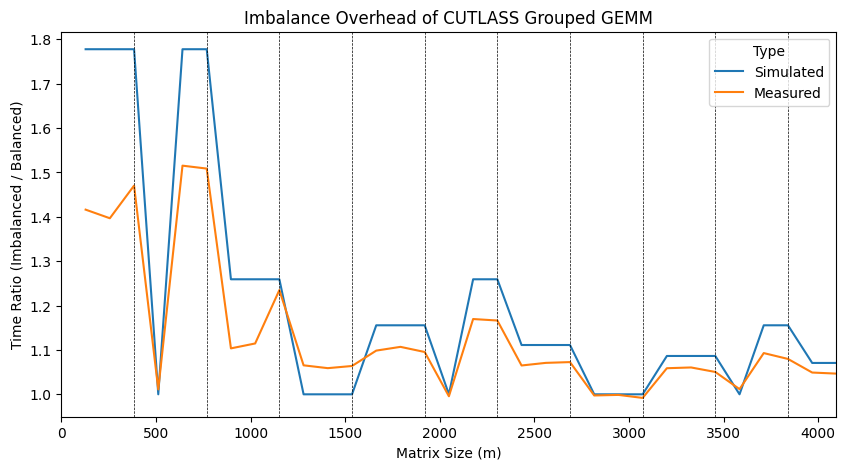

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax = sns.lineplot(data=balanced_df_plot_sim[balanced_df_plot_sim["cutlass_sorted"] == "False"], x="m", y="time_ratio", hue="Type", ax=ax)

ms_with_block_count_mult_108 = set()
for idx, row in balanced_df_plot_sim.iterrows():
    if row["cutlass_sorted"] == "False" and int(row["cutlass_total_tiles"]) % 108 == 0:
        ms_with_block_count_mult_108.add(row["m"])
print(ms_with_block_count_mult_108)
ms_with_block_count_mult_108 = sorted(list(ms_with_block_count_mult_108))
# draw vertical lines
for m in ms_with_block_count_mult_108:
    ax.axvline(m, color="black", linestyle="--", linewidth=0.5)

# zoom in
ax.set_xlim([0, 4096])

ax.set_title("Imbalance Overhead of CUTLASS Grouped GEMM")
ax.set_xlabel("Matrix Size (m)")
ax.set_ylabel("Time Ratio (Imbalanced / Balanced)")

In [98]:
fig.savefig("cutlass_grouped_imbalance_overhead_simulation_zoomedin.png", dpi=300)